In [139]:
import mediapipe as mp
import cv2
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh

In [153]:
import sounddevice as sd
from scipy.io.wavfile import write
freq = 44100
duration = 5
print("started")
recording = sd.rec(int(duration * freq),
                   samplerate=freq, channels=2)
sd.wait()
write("myVoice.wav", freq, recording)

started


In [156]:
cap = cv2.VideoCapture(0)
repeats = 0
factor=0
factors = []

with mp_face_mesh.FaceMesh(static_image_mode=True,
                           max_num_faces=1,
                           refine_landmarks=True,
                           min_detection_confidence=0.7) as face_mesh:
    while cap.isOpened():
        ret, frame = cap.read()

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = face_mesh.process(image)
        #Recolor
        image = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        if results.multi_face_landmarks is None:
            cv2.imshow("Holisitc model detections", image)
            continue
        # 1. Draw face landmarks
        # mp_drawing.draw_landmarks(image, results.multi_face_landmarks[0], mp_face_mesh.FACEMESH_LIPS,
        #                           mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=2),
        #                           mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
        #                           )
        upZ, upY, downZ, downY = 0,0,0,0
        for face in results.multi_face_landmarks:
            for (i, landmark) in enumerate(face.landmark):
                x = landmark.x
                y = landmark.y

                shape = image.shape
                relative_x = int(x * shape[1])
                relative_y = int(y * shape[0])
                if i == 13:
                    upZ = landmark.z
                    upY = relative_y
                    cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 0, 255), thickness=3)
                if i==14:
                    downZ = landmark.z
                    downY = relative_y
                    cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 0, 255), thickness=3)
                else:
                    cv2.circle(image, (relative_x, relative_y), radius=1, color=(225, 0, 100), thickness=1)
        #factor = abs((upY-downY)*upZ*100)
        factor = abs((upY-downY)*upZ*100)
        factors.append(factor)
        if factor>1:
            print("talking")

        cv2.imshow("Holisitc model detections", image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        #print(results.multi_face_landmarks[0].landmark[62].y - results.multi_face_landmarks[0].landmark[66].y)

cap.release()
cv2.destroyAllWindows()

talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking
talking


(250.0, 350.0)

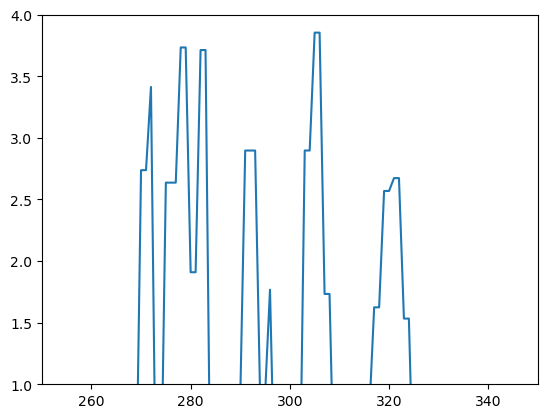

In [132]:
import matplotlib.pyplot as plt
plt.plot(range(len(factors)), factors)
plt.ylim(1,4)
plt.xlim(250,350)

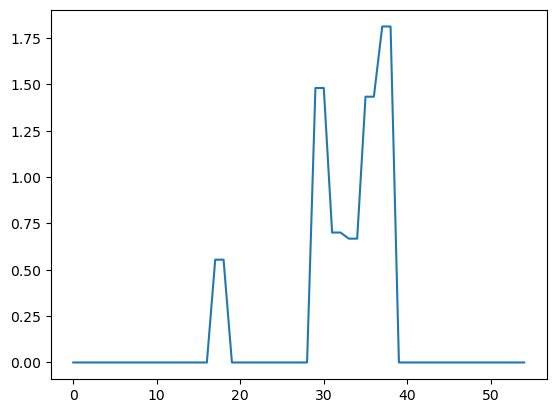

In [113]:
"A"
plt.plot(range(len(factors)), factors)

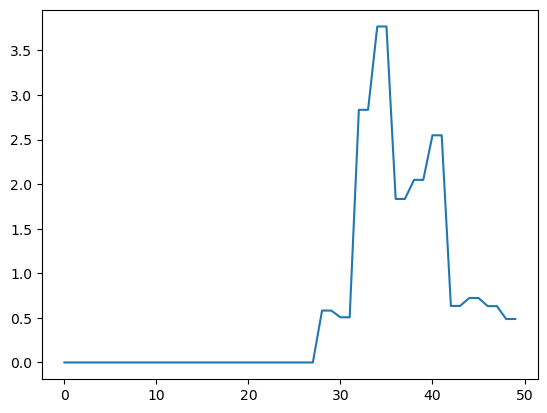

In [115]:
"B"
plt.plot(range(len(factors)), factors)

(1.0, 4.0)

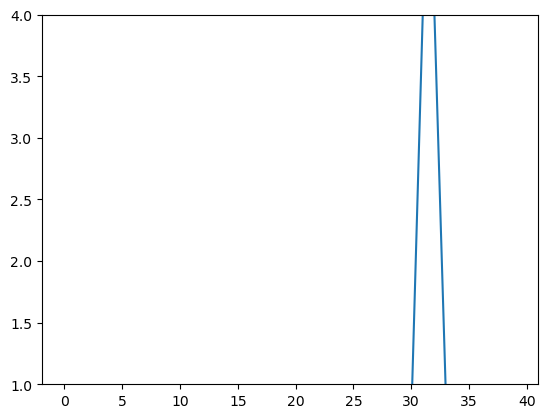

In [127]:
"Б"
plt.plot(range(len(factors)), factors)
plt.ylim(1,4)

(1.0, 4.0)

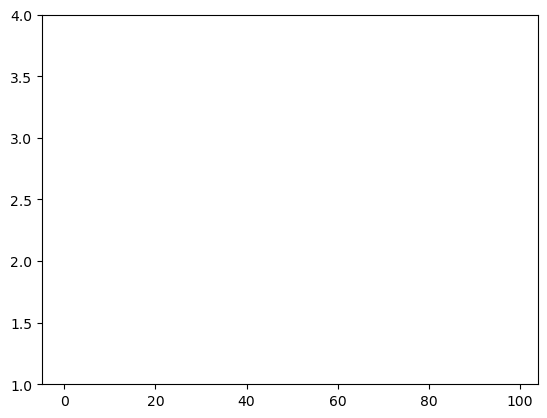

In [118]:
#Smile
plt.plot(range(len(factors)), factors)
plt.ylim(1,4)

(1.0, 4.0)

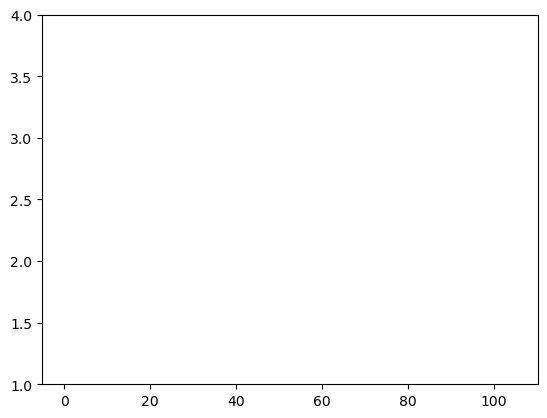

In [121]:
#lips
plt.plot(range(len(factors)), factors)
plt.ylim(1,4)

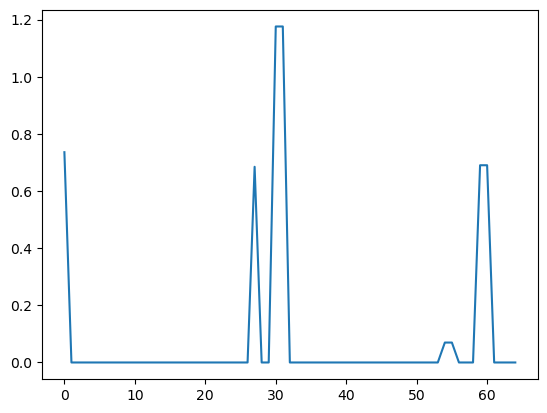

In [90]:
plt.plot(range(len(factors)), factors)

In [ ]:

import math

def get_lip_height(lip):
    sum=0
    for i in [2,3,4]:
        # distance between two near points up and down
        distance = math.sqrt( (lip[i][0] - lip[12-i][0])**2 +
                              (lip[i][1] - lip[12-i][1])**2   )
        sum += distance
    return sum / 3

def get_mouth_height(top_lip, bottom_lip):
    sum=0
    for i in [8,9,10]:
        # distance between two near points up and down
        distance = math.sqrt( (top_lip[i][0] - bottom_lip[18-i][0])**2 +
                              (top_lip[i][1] - bottom_lip[18-i][1])**2   )
        sum += distance
    return sum / 3

def check_mouth_open(top_lip, bottom_lip):
    top_lip_height =    get_lip_height(top_lip)
    bottom_lip_height = get_lip_height(bottom_lip)
    mouth_height =      get_mouth_height(top_lip, bottom_lip)

    # if mouth is open more than lip height * ratio, return true.
    ratio = 0.5
    if mouth_height > min(top_lip_height, bottom_lip_height) * ratio:
        return True
    else:
        return False